Analytics & Data Science

Universidad de Antioquia - ML2

Febrero 2024

Melissa Ortega Alzate CC.1036964792

# Libraries

In [10]:
# Data manipulation
import numpy as np
from sklearn import cluster, datasets, mixture

# Visualization
import matplotlib.pyplot as plt

# klearn clustering algorithms
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
# from sklearn_extra.cluster import KMedoids
from sklearn import datasets
from sklearn.metrics import silhouette_score

# Warnings ignoring
import warnings
warnings.filterwarnings("ignore")

# Functions

In [11]:
# Create function to implement clustering algorithms
def clustering_algorithm(X, algorithm, n_clusters=None):
    """
    Apply a clustering algorithm to a given dataset and compute the silhouette score.

    Parameters:
    X (array-like): Input dataset.
    algorithm (str): Name of the clustering algorithm (Eg. 'KMeans' or 'Spectral').
    n_clusters (int, optional): Number of clusters. Default is None.

    Returns:
    labels (array): Cluster labels assigned to each sample.
    score (float): Silhouette score computed for the dataset and cluster labels.

    """
    algorithms = {
        'KMeans': KMeans(n_clusters=n_clusters, random_state=42),
        # 'KMedoids': KMedoids(n_clusters=n_clusters, random_state=42),
        'DBSCAN': DBSCAN(),
        'Spectral': SpectralClustering(n_clusters=n_clusters, random_state=42)
    }
    
    model = algorithms[algorithm]
    labels = model.fit_predict(X)

    try:
        score = silhouette_score(X, labels)
    except:
        score = None
        
    return labels, score

# 4. Implementing K-means and K-medoids

In [23]:
# See unsupervised.clusters folder
from unsupervised.clusters import kmeans

In [24]:
np.random.seed(42)

X = np.random.rand(3,5)
K =4
X

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864],
       [0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258],
       [0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497]])

In [25]:
from unsupervised.clusters.kmeans import KMEANS

# Define el número de clusters K
K = 2

# Crea una instancia de la clase KMEANS
kmeans = KMEANS()

# Ejecuta el algoritmo de K-means
clusters = kmeans.fit(K, X, max_iterations=50)

# Muestra los resultados
print("Clusters:", clusters)

initial centroids:
 [[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
 [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]]
Final centroids:
 [[0.18370638 0.65956926 0.81020424 0.4707042  0.34863873]
 [       nan        nan        nan        nan        nan]]
Final centroids:
 [[       nan        nan        nan        nan        nan]
 [0.18370638 0.65956926 0.81020424 0.4707042  0.34863873]]
Final centroids:
 [[0.18370638 0.65956926 0.81020424 0.4707042  0.34863873]
 [       nan        nan        nan        nan        nan]]
Final centroids:
 [[       nan        nan        nan        nan        nan]
 [0.18370638 0.65956926 0.81020424 0.4707042  0.34863873]]
Final centroids:
 [[0.18370638 0.65956926 0.81020424 0.4707042  0.34863873]
 [       nan        nan        nan        nan        nan]]
Final centroids:
 [[       nan        nan        nan        nan        nan]
 [0.18370638 0.65956926 0.81020424 0.4707042  0.34863873]]
Final centroids:
 [[0.18370638 0.65956926 0.81020424 

clusters es un array de NumPy que contiene los índices de clúster para todas las muestras de datos en X. Cada elemento del array corresponde a una muestra (fila) de datos en X y contiene el índice del clúster al que pertenece esa muestra. Por lo tanto, cluster_indices es un array unidimensional. Cada valor en este array representa el índice del clúster asignado a la muestra de datos correspondiente en X.

entonces a la fila 1, le toco el cluster 0
a la fila 2

# 6. Create different types of data

In [15]:
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

En cada data set *X* es una matriz de 500 filas y dos columas, representando las coordenadas *x* y *y* de los puntos. Es decir, contiene 500 pares de puntos. Además,*y* es un vector que contiene las etiquetas correspondientes a cada punto de datos. 
- noisy_circles: las etiquetas representan si el punto hace parte del círculo interior o exterior.
- noisy_moons:las etiquetas representan si el punto hace parte del semicírculo superior o inferior.
- blobs: Las etiquetas representan los diferentes grupos o clusters a los que pertenecen los puntos.

### 6a. Plot the different datasets in separate figures. What can you say about them?

- mejorar aspecto de las figs, bordes, paleta de color


============ Noisy circles
Tamaño de X: (500, 2)
Size of y: (500,)

============ Noisy moons
Tamaño de X: (500, 2)
Size of y: (500,)

============ Blobs
Tamaño de X: (500, 2)
Size of y: (500,)

============ No structure
Tamaño de X: (500, 2)
Size of y: No labels in this dataset

============ Aniso (blobs transformed)
Tamaño de X: (500, 2)
Size of y: (500,)

============ Varied
Tamaño de X: (500, 2)
Size of y: (500,)


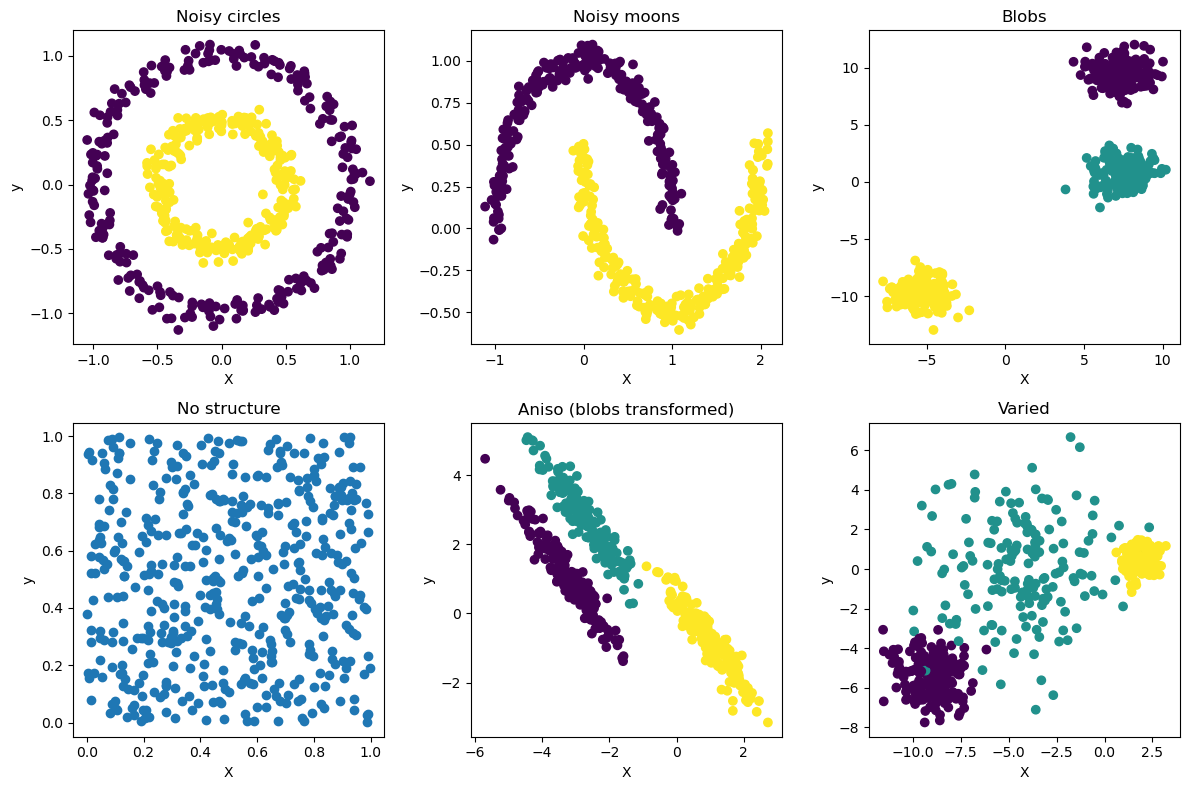

In [16]:
# Definir variables
datasets_list = [noisy_circles, noisy_moons, blobs, no_structure, aniso, varied]
titles = ['Noisy circles', 'Noisy moons', 'Blobs', 'No structure', 'Aniso (blobs transformed)', 'Varied']

# Graficar los diferentes conjuntos de datos
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i, dataset in enumerate(datasets_list):
    row = i // 3
    col = i % 3
    X, y = dataset
    axs[row, col].scatter(X[:, 0], X[:, 1], c=y)
    axs[row, col].set_title(titles[i])
    axs[row, col].set_xlabel('X')
    axs[row, col].set_ylabel('y')
    
    print('\n'+f"==" * 6 + f" {titles[i]}")
    print("Tamaño de X:", X.shape)
    print("Size of y:", y.shape if y is not None else "No labels in this dataset")
    
plt.tight_layout()
plt.show()

### 6b. Apply k-means, k-medoids, DBSCAN and Spectral Clustering from Scikit-Learn over each dataset

- why n_clusters = 2
- interpretar silueta, comparar
- porque DBSCAN sin silueta
- falta kmediods


In [17]:
# Define the number of clusters for the algorithms
n_clusters = 2

# Define the list of clustering algorithms to compare
algorithms = ['KMeans', 'DBSCAN','Spectral']
print(f"Silhouette score comparision")

# Apply every clustering algorithm to each dataset
for i, dataset in enumerate(datasets_list):
    X, _ = dataset
    
    print(f"\n=== Dataset: {titles[i]}")
    for algorithm in algorithms:
        labels, score = clustering_algorithm(X, algorithm, n_clusters=n_clusters)
        print(f"{algorithm}: {score}")


Silhouette score comparision

=== Dataset: Noisy circles
KMeans: 0.3511392726536757
DBSCAN: None
Spectral: 0.3512972137258492

=== Dataset: Noisy moons
KMeans: 0.49085207170232287
DBSCAN: None
Spectral: 0.49179092880367103

=== Dataset: Blobs
KMeans: 0.7851727153851467
DBSCAN: 0.1794770492448021
Spectral: 0.7851727153851467

=== Dataset: No structure
KMeans: 0.3563447347296721
DBSCAN: None
Spectral: 0.3465691536276029

=== Dataset: Aniso (blobs transformed)
KMeans: 0.6346291254246498
DBSCAN: 0.44368737545334247
Spectral: 0.6354933647035526

=== Dataset: Varied
KMeans: 0.6223163248002486
DBSCAN: 0.42649013649742745
Spectral: 0.615514632969388


# Bibliografy 

#### K-means
- https://dev.to/sajal2692/coding-k-means-clustering-using-python-and-numpy-fg1
- https://github.com/rushter/MLAlgorithms/blob/035e489a879d01a84fffff74885dc6b1bca3c96f/mla/kmeans.py
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py
